## 2022 Cost of Living Data Analysis

Information Source: https://www.numbeo.com/cost-of-living/prices_by_city.jsp?displayCurrency=EUR&itemId=101&itemId=100&itemId=228&itemId=224&itemId=60&itemId=66&itemId=64&itemId=62&itemId=110&itemId=118&itemId=121&itemId=14&itemId=19&itemId=17&itemId=15&itemId=11&itemId=16&itemId=113&itemId=9&itemId=12&itemId=8&itemId=119&itemId=111&itemId=112&itemId=115&itemId=116&itemId=13&itemId=27&itemId=26&itemId=29&itemId=28&itemId=114&itemId=6&itemId=4&itemId=5&itemId=3&itemId=2&itemId=1&itemId=7&itemId=105&itemId=106&itemId=44&itemId=40&itemId=42&itemId=24&itemId=20&itemId=18&itemId=109&itemId=108&itemId=107&itemId=206&itemId=25&itemId=32&itemId=30&itemId=33

# 1.0 Gathering Data & Pre-processing

We are currently in an unfavorable market. As the US dollar is stretching thinner and prices are hiking up due to global supply chain issues, it seem right now is an optimal time to evaluate where to relocate one's life based on affordability and life style choices. Looking at publicly available global data from the website listed above, one would be able to draw some direction for where one could live, for how much and what their life could look like? 

###### Goal:
We are looking for which region in the world where we could live as a "foodie" and eat as many restaurant quality meal, with the constraints being how much we could expect for salary and accounting for rent.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_list = pd.read_html( "https://www.numbeo.com/cost-of-living/prices_by_city.jsp?itemId=101&itemId=100&itemId=228&itemId=224&itemId=60&itemId=66&itemId=64&itemId=62&itemId=110&itemId=118&itemId=121&itemId=14&itemId=19&itemId=17&itemId=15&itemId=11&itemId=16&itemId=113&itemId=9&itemId=12&itemId=8&itemId=119&itemId=111&itemId=112&itemId=115&itemId=116&itemId=13&itemId=27&itemId=26&itemId=29&itemId=28&itemId=114&itemId=6&itemId=4&itemId=5&itemId=3&itemId=2&itemId=1&itemId=7&itemId=105&itemId=106&itemId=44&itemId=40&itemId=42&itemId=24&itemId=20&itemId=18&itemId=109&itemId=108&itemId=107&itemId=206&itemId=25&itemId=32&itemId=30&itemId=33&displayCurrency=USD")

In [3]:
df_table=df_list[2]

In [4]:
df_list[2]

,Rank,City,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,NaN,"Saint Petersburg, Russia",11.57,49.57,6.61,3.30,4.13,1.18,0.64,1.35,...,1.52,2.91,1.98,2.80,1.35,0.87,11.32,44477.88,547.12,9081.72
1,NaN,"Algiers, Algeria",2.71,21.65,4.69,1.80,2.27,0.49,0.19,0.87,...,0.57,0.95,1.16,0.80,2.98,0.39,11.21,26956.06,102.10,3204.51
2,NaN,"Istanbul, Turkey",4.83,22.83,4.30,2.69,3.22,0.87,0.30,0.95,...,0.63,1.80,1.62,0.82,1.75,0.51,9.02,32428.09,240.79,5068.95
3,NaN,"Izmir, Turkey",3.76,18.81,3.76,1.88,2.26,0.62,0.24,0.89,...,0.62,1.65,1.27,1.08,1.33,0.43,8.89,28932.69,165.83,3299.99
4,NaN,"Helsinki, Finland",13.49,83.04,9.34,7.27,8.30,2.77,1.81,1.01,...,1.93,4.19,2.28,3.58,1.71,1.44,18.95,31660.19,419.76,5397.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,NaN,"Bursa, Turkey",3.49,48.37,3.63,2.15,2.69,0.61,0.20,0.76,...,0.66,1.71,1.43,1.06,1.21,0.33,8.78,37966.06,294.82,8794.37
130,NaN,"Melbourne, Australia",15.56,81.21,9.31,6.77,6.77,2.60,2.25,1.33,...,3.05,3.24,2.13,5.09,2.42,2.10,13.51,18926.74,1651.85,17061.07
131,NaN,"Perth, Australia",16.79,67.17,9.37,6.72,6.72,2.48,2.12,1.59,...,1.72,3.31,1.80,3.90,2.52,1.43,13.16,19758.65,1276.14,12720.73
132,NaN,"Sydney, Australia",13.41,77.13,9.21,6.54,6.04,2.19,1.97,1.38,...,2.55,3.06,1.80,5.28,2.35,2.06,13.41,19570.61,1650.20,14826.80


In [5]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 57 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Rank                                                                        0 non-null      float64
 1   City                                                                        134 non-null    object 
 2   Meal, Inexpensive Restaurant                                                134 non-null    float64
 3   Meal for 2 People, Mid-range Restaurant, Three-course                       134 non-null    float64
 4   McMeal at McDonalds (or Equivalent Combo Meal)                              134 non-null    float64
 5   Domestic Beer (0.5 liter draught)                                           134 non-null    float64
 6   Imported Beer (0.33 liter bottle)                 

In [6]:
df_table=df_table.drop(columns='Rank')

In [7]:
df_table.head()

,City,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",11.57,49.57,6.61,3.30,4.13,1.18,0.64,1.35,0.98,...,1.52,2.91,1.98,2.80,1.35,0.87,11.32,44477.88,547.12,9081.72
1,"Algiers, Algeria",2.71,21.65,4.69,1.80,2.27,0.49,0.19,0.87,0.17,...,0.57,0.95,1.16,0.80,2.98,0.39,11.21,26956.06,102.10,3204.51
2,"Istanbul, Turkey",4.83,22.83,4.30,2.69,3.22,0.87,0.30,0.95,0.47,...,0.63,1.80,1.62,0.82,1.75,0.51,9.02,32428.09,240.79,5068.95
3,"Izmir, Turkey",3.76,18.81,3.76,1.88,2.26,0.62,0.24,0.89,0.35,...,0.62,1.65,1.27,1.08,1.33,0.43,8.89,28932.69,165.83,3299.99
4,"Helsinki, Finland",13.49,83.04,9.34,7.27,8.30,2.77,1.81,1.01,2.33,...,1.93,4.19,2.28,3.58,1.71,1.44,18.95,31660.19,419.76,5397.80


In [8]:
df_table.describe()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,9.605821,46.065746,6.762313,3.567239,4.183358,1.475448,1.110000,1.199403,1.385075,2.389254,...,1.150149,2.703134,1.820522,2.239179,1.537612,1.135896,11.808358,25067.835000,546.115075,9410.778284
std,5.824247,24.884528,2.454033,2.314244,2.212835,0.859622,0.785017,0.476699,0.883997,0.969757,...,0.603854,1.163771,1.053521,1.345245,0.558127,0.731591,6.502333,8523.595515,525.296164,6920.359548
min,1.360000,10.880000,3.260000,0.810000,1.350000,0.260000,0.150000,0.440000,0.170000,0.840000,...,0.230000,0.820000,0.660000,0.300000,0.570000,0.260000,3.980000,16535.220000,26.620000,426.950000
25%,4.900000,25.435000,4.955000,1.885000,2.582500,0.622500,0.442500,0.882500,0.682500,1.625000,...,0.722500,1.770000,1.187500,1.325000,1.210000,0.632500,7.740000,20522.327500,206.622500,4395.400000
50%,7.740000,39.960000,6.295000,2.540000,3.680000,1.340000,0.945000,1.095000,1.130000,2.280000,...,0.990000,2.475000,1.565000,1.895000,1.460000,0.920000,10.190000,22913.345000,347.215000,7763.265000
75%,13.685000,62.280000,8.907500,5.190000,5.190000,2.185000,1.637500,1.350000,1.920000,2.967500,...,1.482500,3.500000,2.110000,2.910000,1.817500,1.397500,13.765000,28095.902500,681.747500,12369.080000
max,26.440000,126.930000,16.030000,12.250000,13.540000,4.630000,4.290000,3.100000,4.170000,6.000000,...,3.050000,5.850000,7.950000,6.640000,3.720000,3.900000,51.430000,97187.770000,2906.390000,41333.330000


In [9]:
df_table.shape

(134, 56)

In [10]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 56 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   City                                                                        134 non-null    object 
 1   Meal, Inexpensive Restaurant                                                134 non-null    float64
 2   Meal for 2 People, Mid-range Restaurant, Three-course                       134 non-null    float64
 3   McMeal at McDonalds (or Equivalent Combo Meal)                              134 non-null    float64
 4   Domestic Beer (0.5 liter draught)                                           134 non-null    float64
 5   Imported Beer (0.33 liter bottle)                                           134 non-null    float64
 6   Coke/Pepsi (0.33 liter bottle)                    

In [11]:
#extract from website the regions and their corresponding cities as a way to index
#need to do this for africa, america, asia, europe, and oceania
df_list_africa = pd.read_html("https://www.numbeo.com/cost-of-living/region_prices_by_city?displayCurrency=USD&itemId=101&itemId=100&itemId=228&itemId=224&itemId=60&itemId=66&itemId=64&itemId=62&itemId=110&itemId=118&itemId=121&itemId=14&itemId=19&itemId=17&itemId=15&itemId=11&itemId=16&itemId=113&itemId=9&itemId=12&itemId=8&itemId=119&itemId=111&itemId=112&itemId=115&itemId=116&itemId=13&itemId=27&itemId=26&itemId=29&itemId=28&itemId=114&itemId=6&itemId=4&itemId=5&itemId=3&itemId=2&itemId=1&itemId=7&itemId=105&itemId=106&itemId=44&itemId=40&itemId=42&itemId=24&itemId=20&itemId=18&itemId=109&itemId=108&itemId=107&itemId=206&itemId=25&itemId=32&itemId=30&itemId=33&region=002")
df_list_america = pd.read_html("https://www.numbeo.com/cost-of-living/region_prices_by_city?itemId=101&itemId=100&itemId=228&itemId=224&itemId=60&itemId=66&itemId=64&itemId=62&itemId=110&itemId=118&itemId=121&itemId=14&itemId=19&itemId=17&itemId=15&itemId=11&itemId=16&itemId=113&itemId=9&itemId=12&itemId=8&itemId=119&itemId=111&itemId=112&itemId=115&itemId=116&itemId=13&itemId=27&itemId=26&itemId=29&itemId=28&itemId=114&itemId=6&itemId=4&itemId=5&itemId=3&itemId=2&itemId=1&itemId=7&itemId=105&itemId=106&itemId=44&itemId=40&itemId=42&itemId=24&itemId=20&itemId=18&itemId=109&itemId=108&itemId=107&itemId=206&itemId=25&itemId=32&itemId=30&itemId=33&region=019&displayCurrency=USD")
df_list_asia = pd.read_html("https://www.numbeo.com/cost-of-living/region_prices_by_city?itemId=101&itemId=100&itemId=228&itemId=224&itemId=60&itemId=66&itemId=64&itemId=62&itemId=110&itemId=118&itemId=121&itemId=14&itemId=19&itemId=17&itemId=15&itemId=11&itemId=16&itemId=113&itemId=9&itemId=12&itemId=8&itemId=119&itemId=111&itemId=112&itemId=115&itemId=116&itemId=13&itemId=27&itemId=26&itemId=29&itemId=28&itemId=114&itemId=6&itemId=4&itemId=5&itemId=3&itemId=2&itemId=1&itemId=7&itemId=105&itemId=106&itemId=44&itemId=40&itemId=42&itemId=24&itemId=20&itemId=18&itemId=109&itemId=108&itemId=107&itemId=206&itemId=25&itemId=32&itemId=30&itemId=33&region=142&displayCurrency=USD")
df_list_europe = pd.read_html("https://www.numbeo.com/cost-of-living/region_prices_by_city?itemId=101&itemId=100&itemId=228&itemId=224&itemId=60&itemId=66&itemId=64&itemId=62&itemId=110&itemId=118&itemId=121&itemId=14&itemId=19&itemId=17&itemId=15&itemId=11&itemId=16&itemId=113&itemId=9&itemId=12&itemId=8&itemId=119&itemId=111&itemId=112&itemId=115&itemId=116&itemId=13&itemId=27&itemId=26&itemId=29&itemId=28&itemId=114&itemId=6&itemId=4&itemId=5&itemId=3&itemId=2&itemId=1&itemId=7&itemId=105&itemId=106&itemId=44&itemId=40&itemId=42&itemId=24&itemId=20&itemId=18&itemId=109&itemId=108&itemId=107&itemId=206&itemId=25&itemId=32&itemId=30&itemId=33&region=150&displayCurrency=USD")
df_list_oceania = pd.read_html("https://www.numbeo.com/cost-of-living/region_prices_by_city?itemId=101&itemId=100&itemId=228&itemId=224&itemId=60&itemId=66&itemId=64&itemId=62&itemId=110&itemId=118&itemId=121&itemId=14&itemId=19&itemId=17&itemId=15&itemId=11&itemId=16&itemId=113&itemId=9&itemId=12&itemId=8&itemId=119&itemId=111&itemId=112&itemId=115&itemId=116&itemId=13&itemId=27&itemId=26&itemId=29&itemId=28&itemId=114&itemId=6&itemId=4&itemId=5&itemId=3&itemId=2&itemId=1&itemId=7&itemId=105&itemId=106&itemId=44&itemId=40&itemId=42&itemId=24&itemId=20&itemId=18&itemId=109&itemId=108&itemId=107&itemId=206&itemId=25&itemId=32&itemId=30&itemId=33&region=009&displayCurrency=USD")

In [12]:
#extracted dataframes separated by regions on numbeo
df_table_africa=df_list_africa[1]
df_table_america=df_list_america[1]
df_table_asia=df_list_asia[1]
df_table_europe=df_list_europe[1]
df_table_oceania=df_list_oceania[1]

In [13]:
df_table_africa['region'] = 'Africa'
df_table_america['region'] = 'America'
df_table_asia['region'] = 'Asia'
df_table_europe['region'] = 'Europe'
df_table_oceania['region'] = 'Oceania'

In [14]:
df_table_new = pd.concat([df_table_africa,df_table_america, df_table_asia, df_table_europe, df_table_oceania], ignore_index=True, axis=0)

In [15]:
df_table_new.shape

(134, 58)

In [16]:
df_table_new.dtypes

Rank                                                                          float64
City                                                                           object
Meal, Inexpensive Restaurant                                                  float64
Meal for 2 People, Mid-range Restaurant, Three-course                         float64
McMeal at McDonalds (or Equivalent Combo Meal)                                float64
Domestic Beer (0.5 liter draught)                                             float64
Imported Beer (0.33 liter bottle)                                             float64
Coke/Pepsi (0.33 liter bottle)                                                float64
Water (0.33 liter bottle)                                                     float64
Milk (regular), (1 liter)                                                     float64
Loaf of Fresh White Bread (500g)                                              float64
Eggs (regular) (12)                                   

In [17]:
df_table_new.head()

,Rank,City,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",...,Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",region
0,NaN,"Cape Town, South Africa",8.67,34.69,4.05,2.31,2.60,0.90,0.68,0.92,...,1.83,1.43,1.46,1.40,1.08,6.35,21712.42,193.63,4537.21,Africa
1,NaN,"Algiers, Algeria",2.71,21.65,4.69,1.80,2.27,0.49,0.19,0.87,...,0.95,1.16,0.80,2.98,0.39,11.21,26956.06,102.10,3204.51,Africa
2,NaN,"Johannesburg, South Africa",8.68,34.73,4.34,2.32,2.32,0.91,0.73,1.08,...,1.84,1.51,1.49,1.43,1.19,6.99,21124.54,226.17,4754.67,Africa
3,NaN,"Tunis, Tunisia",2.68,15.78,4.73,1.58,2.21,0.54,0.25,0.44,...,0.82,0.78,0.56,1.85,0.45,9.69,31639.58,95.52,2699.62,Africa
4,NaN,"Casablanca, Morocco",3.64,18.68,6.07,2.80,3.74,0.45,0.33,0.68,...,1.76,1.38,0.57,1.10,0.43,7.28,22206.45,190.99,3290.21,Africa


In [18]:
df_table_new = df_table_new.drop(columns='Rank')

In [19]:
#converting 3 bedroom city apartment rent prices per individual
df_table_new['Apartment (3 bedrooms) in City Centre']=df_table_new['Apartment (3 bedrooms) in City Centre']*0.333

In [20]:
#converting 3 bedroom outside of city, apartment rent prices per individual
df_table_new['Apartment (3 bedrooms) Outside of Centre']=df_table_new['Apartment (3 bedrooms) Outside of Centre']*0.333

In [21]:
#converting mid-range restaurant prices to be reflect per person
df_table_new['Meal for 2 People, Mid-range Restaurant, Three-course']=df_table_new['Meal for 2 People, Mid-range Restaurant, Three-course']*0.5

In [22]:
#changing salary from monthly to reflect yearly after tax
df_table_new['Average Yearly Net Salary (After Tax)']=df_table_new['Average Monthly Net Salary (After Tax)']*12

In [23]:
#drop old column for monthly salary, since we now have yearly data
df_table_new = df_table_new.drop(columns='Average Monthly Net Salary (After Tax)')

In [24]:
df_table_new.head()

,City,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",region,Average Yearly Net Salary (After Tax)
0,"Cape Town, South Africa",8.67,17.345,4.05,2.31,2.60,0.90,0.68,0.92,0.96,...,1.43,1.46,1.40,1.08,6.35,21712.42,193.63,4537.21,Africa,15410.16
1,"Algiers, Algeria",2.71,10.825,4.69,1.80,2.27,0.49,0.19,0.87,0.17,...,1.16,0.80,2.98,0.39,11.21,26956.06,102.10,3204.51,Africa,3450.12
2,"Johannesburg, South Africa",8.68,17.365,4.34,2.32,2.32,0.91,0.73,1.08,0.89,...,1.51,1.49,1.43,1.19,6.99,21124.54,226.17,4754.67,Africa,18392.40
3,"Tunis, Tunisia",2.68,7.890,4.73,1.58,2.21,0.54,0.25,0.44,0.17,...,0.78,0.56,1.85,0.45,9.69,31639.58,95.52,2699.62,Africa,3195.72
4,"Casablanca, Morocco",3.64,9.340,6.07,2.80,3.74,0.45,0.33,0.68,0.47,...,1.38,0.57,1.10,0.43,7.28,22206.45,190.99,3290.21,Africa,5809.68


In [25]:
#changing apartment rent related features for section 2.0.0
df_table_new = df_table_new.rename(columns={"Apartment (1 bedroom) in City Centre":'City1of1',
                             "Apartment (1 bedroom) Outside of Centre":"OuterCity1of1",
                             "Apartment (3 bedrooms) in City Centre":"City1of3",
                             "Apartment (3 bedrooms) Outside of Centre":"OuterCity1of3" })

In [26]:
df_table_new.dtypes

City                                                                           object
Meal, Inexpensive Restaurant                                                  float64
Meal for 2 People, Mid-range Restaurant, Three-course                         float64
McMeal at McDonalds (or Equivalent Combo Meal)                                float64
Domestic Beer (0.5 liter draught)                                             float64
Imported Beer (0.33 liter bottle)                                             float64
Coke/Pepsi (0.33 liter bottle)                                                float64
Water (0.33 liter bottle)                                                     float64
Milk (regular), (1 liter)                                                     float64
Loaf of Fresh White Bread (500g)                                              float64
Eggs (regular) (12)                                                           float64
Local Cheese (1kg)                                    

In [27]:
print(df_table_new[df_table_new['region'] == 'Africa'].City1of1)

0    708.47
1    234.05
2    401.70
3    219.40
4    407.84
5    195.57
6    399.75
Name: City1of1, dtype: float64


In [54]:
#changing eating out related features for section 3.0.0
df_table_new = df_table_new.rename(columns={"Meal, Inexpensive Restaurant":'CheapMealfor1',
                             "Meal for 2 People, Mid-range Restaurant, Three-course":'RestaurantMealfor1'})

In [38]:
#changing salary related features for section 4.0.0
df_table_new = df_table_new.rename(columns={"Average Yearly Net Salary (After Tax)":'YearlySalaryPostTax'})

# 2.0 Comparing Housing Costs

What does rent look like across the cities? Which country is the most expensive? Which country is the least expensive? We will take a look at individual boxplots for city rent across. 

### 2.1 Examing City Center Rent Rates

Text(0, 0.5, 'Rent')

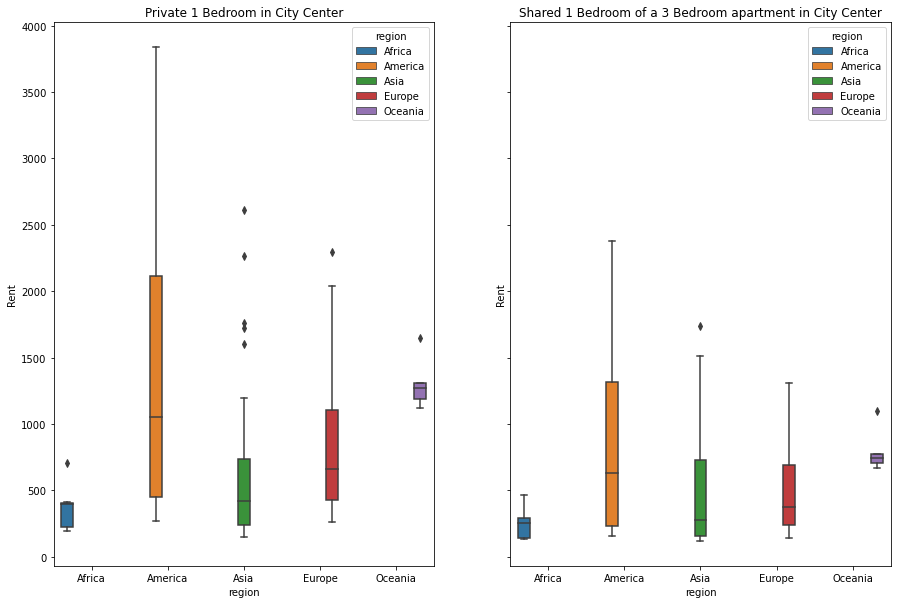

In [48]:
#boxplot of all city regions 
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(15,10))
sns.boxplot(ax=axes[0], data=df_table_new, x='region', y='City1of1', hue ='region')
axes[0].set_title('Private 1 Bedroom in City Center')
axes[0].set_ylabel('Rent')
#note we did processing before "Section 2.0 housing" adjusting feature 'Apartment (3 bedrooms) in City Centre'
#to represent rent per person in shared 3 bedroom apartment in the city
sns.boxplot(ax=axes[1], data=df_table_new, x='region', y='City1of3', hue ='region')
axes[1].set_title('Shared 1 Bedroom of a 3 Bedroom apartment in City Center')
axes[1].set_ylabel('Rent')

In [49]:
print('Below are Median Values for Private 1 Bed to 1 Bed Shared Apartment rents in city centers per region:')
print('Africa:', np.median(df_table_new[df_table_new['region'] == 'Africa'].City1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Africa'].City1of3))
print('America:', np.median(df_table_new[df_table_new['region'] == 'America'].City1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'America'].City1of3))
print('Asia:', np.median(df_table_new[df_table_new['region'] == 'Asia'].City1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Asia'].City1of3))
print('Europe:', np.median(df_table_new[df_table_new['region'] == 'Europe'].City1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Europe'].City1of3))
print('Oceania:', np.median(df_table_new[df_table_new['region'] == 'Oceania'].City1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Oceania'].City1of3))
print('-----------------------------------')
print('Below are Mean Values for Private 1 Bed to 1 Bed Shared Apartment rents in city centers per region: ')
print('Africa:', np.mean(df_table_new[df_table_new['region'] == 'Africa'].City1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'Africa'].City1of3))
print('America:', np.mean(df_table_new[df_table_new['region'] == 'America'].City1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'America'].City1of3))
print('Asia:', np.mean(df_table_new[df_table_new['region'] == 'Asia'].City1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'Asia'].City1of3))
print('Europe:', np.mean(df_table_new[df_table_new['region'] == 'Europe'].City1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'Europe'].City1of3))
print('Oceania:', np.mean(df_table_new[df_table_new['region'] == 'Oceania'].City1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'Oceania'].City1of3))

Below are Median Values for Private 1 Bed to 1 Bed Shared Apartment rents in city centers per region:
Africa: 399.75 to 253.85922000000002
America: 1053.56 to 627.60843
Asia: 420.93 to 275.22783000000004
Europe: 659.91 to 370.66562999999996
Oceania: 1269.205 to 740.10915
-----------------------------------
Below are Mean Values for Private 1 Bed to 1 Bed Shared Apartment rents in city centers per region: 
Africa: 366.6828571428572 to 244.6246542857143
America: 1331.5609523809524 to 798.4769142857143
Asia: 657.3051428571426 to 460.8021651428571
Europe: 807.7641538461539 to 478.5737164615384
Oceania: 1296.95 to 786.7879800000001


### 2.2 Examing Non-City Center Rent Rates

Text(0, 0.5, 'Rent')

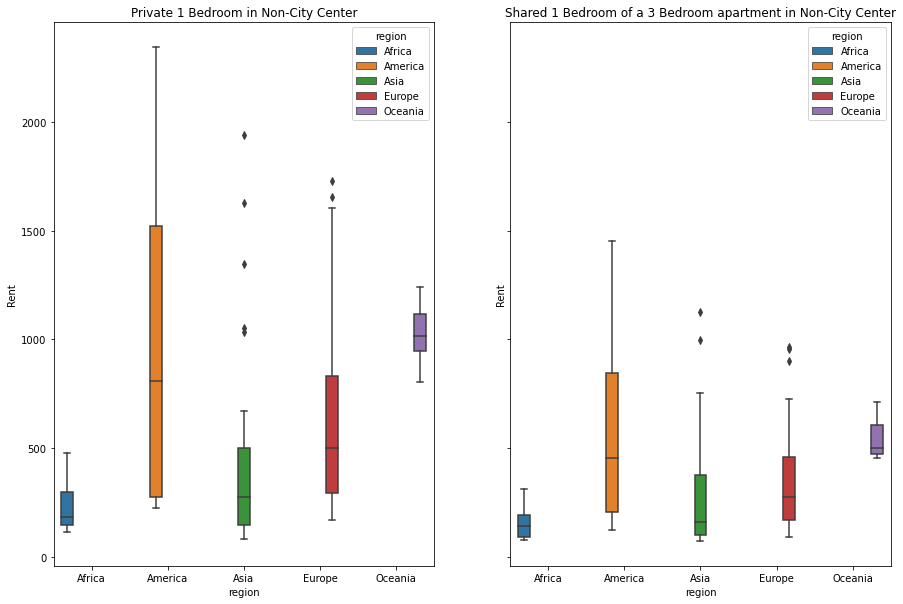

In [50]:
#boxplot of all outer city regions 
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(15,10))
sns.boxplot(ax=axes[0], data=df_table_new, x='region', y='OuterCity1of1', hue ='region')
axes[0].set_title('Private 1 Bedroom in Non-City Center')
axes[0].set_ylabel('Rent')

sns.boxplot(ax=axes[1], data=df_table_new, x='region', y='OuterCity1of3', hue ='region')
axes[1].set_title('Shared 1 Bedroom of a 3 Bedroom apartment in Non-City Center')
axes[1].set_ylabel('Rent')

In [51]:
print('Below are Median Values for Private 1 Bed to 1 Bed Shared Apartment rents outside of city centers per region:')
print('Africa:', np.median(df_table_new[df_table_new['region'] == 'Africa'].OuterCity1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Africa'].OuterCity1of3))
print('America:', np.median(df_table_new[df_table_new['region'] == 'America'].OuterCity1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'America'].OuterCity1of3))
print('Asia:', np.median(df_table_new[df_table_new['region'] == 'Asia'].OuterCity1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Asia'].OuterCity1of3))
print('Europe:', np.median(df_table_new[df_table_new['region'] == 'Europe'].OuterCity1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Europe'].OuterCity1of3))
print('Oceania:', np.median(df_table_new[df_table_new['region'] == 'Oceania'].OuterCity1of1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Oceania'].OuterCity1of3))
print('-----------------------------------')
print('Below are Mean Values for Private 1 Bed to 1 Bed Shared Apartment rents outside of city centers per region:')
print('Africa:', np.mean(df_table_new[df_table_new['region'] == 'Africa'].OuterCity1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'Africa'].OuterCity1of3))
print('America:', np.mean(df_table_new[df_table_new['region'] == 'America'].OuterCity1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'America'].OuterCity1of3))
print('Asia:', np.mean(df_table_new[df_table_new['region'] == 'Asia'].OuterCity1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'Asia'].OuterCity1of3))
print('Europe:', np.mean(df_table_new[df_table_new['region'] == 'Europe'].OuterCity1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'Europe'].OuterCity1of3))
print('Oceania:', np.mean(df_table_new[df_table_new['region'] == 'Oceania'].OuterCity1of1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'Oceania'].OuterCity1of3))

Below are Median Values for Private 1 Bed to 1 Bed Shared Apartment rents outside of city centers per region:
Africa: 182.44 to 141.44175
America: 808.56 to 454.25529000000006
Asia: 274.08 to 158.18166
Europe: 502.39 to 275.69403
Oceania: 1014.7950000000001 to 501.329835
-----------------------------------
Below are Mean Values for Private 1 Bed to 1 Bed Shared Apartment rents outside of city centers per region:
Africa: 238.06285714285715 to 156.84300000000002
America: 993.5 to 576.5219485714287
Asia: 426.9597142857143 to 281.7555814285715
Europe: 607.532153846154 to 341.0688461538463
Oceania: 1024.5649999999998 to 545.55279


Due to outliers that are visible via the boxplot graphs above, it makes more sense to examine the median value for rent per each particular category of private and shared 1 bedrooms per region as outliers can skew the mean. One could also approach the outliers by replacing values that are deemed more than +/- 3 standard deviations from the mean with statistical values like the median or mean. From a cost saving's perspective for rent, it's cheaper in both the city center and outside of the city center to live with roommates versus having your own private 1 bedroom. We can also conclude that living in the city is also more expensive than living in a non-city center place; across the board, it's a minimum difference of 150$ for those to live in the city center versus non-city center for their own private accomodation.

## 3.0 Comparing Food Costs

What does food cost for eating at varying grades of restaurants look like by region?

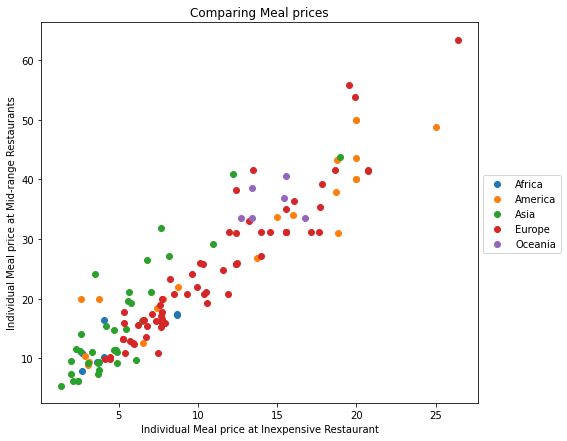

In [56]:
fig, ax = plt.subplots(figsize=(9,7))
for region in df_table_new["region"].unique():
    df_table_new_sub = df_table_new[df_table_new["region"] == region]
    ax.scatter(df_table_new_sub["CheapMealfor1"], df_table_new_sub["RestaurantMealfor1"], label=region)
ax.set_ylabel("Individual Meal price at Mid-range Restaurants")
ax.set_xlabel("Individual Meal price at Inexpensive Restaurant")
#set the xrange and the y range to be the same

fig.subplots_adjust(right=0.8)
ax.set_title('Comparing Meal prices')
ax.legend(
    loc="center left",
    bbox_to_anchor=(0.8, 0.5),
    bbox_transform=fig.transFigure
)
plt.show()


From this scatter plot, we can make out that Asia and Africa are the cheapest regions to eat on average for either mid-range restaurant meals or even inexpensive restaurants. We'll examine a boxplot below to showcase this point even more.

Text(0, 0.5, 'Meal Price')

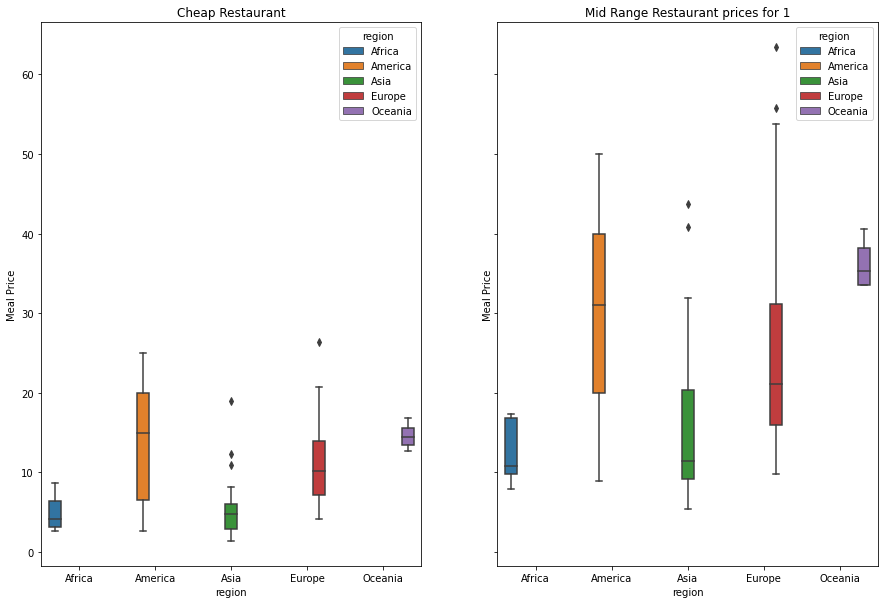

In [55]:
#boxplot Cheap Meals
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(15,10))
sns.boxplot(ax=axes[0], data=df_table_new, x='region', y='CheapMealfor1', hue ='region')
axes[0].set_title('Cheap Restaurant')
axes[0].set_ylabel('Meal Price')

#boxplot of mid-range restaurant meals
sns.boxplot(ax=axes[1], data=df_table_new, x='region', y='RestaurantMealfor1', hue ='region')
axes[1].set_title('Mid Range Restaurant prices for 1')
axes[1].set_ylabel('Meal Price')

In [57]:
print('Below are Median Inexpensive Meals to Mid Range Restaurant meals per region:')
print('Africa:', np.median(df_table_new[df_table_new['region'] == 'Africa'].CheapMealfor1), 'to',
      np.median(df_table_new[df_table_new['region'] == 'Africa'].RestaurantMealfor1))
print('America:', np.median(df_table_new[df_table_new['region'] == 'America'].CheapMealfor1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'America'].RestaurantMealfor1))
print('Asia:', np.median(df_table_new[df_table_new['region'] == 'Asia'].CheapMealfor1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Asia'].RestaurantMealfor1))
print('Europe:', np.median(df_table_new[df_table_new['region'] == 'Europe'].CheapMealfor1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Europe'].RestaurantMealfor1))
print('Oceania:', np.median(df_table_new[df_table_new['region'] == 'Oceania'].CheapMealfor1), 'to',
     np.median(df_table_new[df_table_new['region'] == 'Oceania'].RestaurantMealfor1))
print('-----------------------------------')
print('Below are Mean Inexpensive Meals to Mid Range Restaurant meals accounting for standard deviation per region:')
print('Africa:', np.mean(df_table_new[df_table_new['region'] == 'Africa'].CheapMealfor1), '+/-',
      np.std(df_table_new[df_table_new['region'] == 'Africa'].CheapMealfor1), 'to',
      np.mean(df_table_new[df_table_new['region'] == 'Africa'].RestaurantMealfor1), '+/-',
      np.std(df_table_new[df_table_new['region'] == 'Africa'].RestaurantMealfor1))
print('America:', np.mean(df_table_new[df_table_new['region'] == 'America'].CheapMealfor1), '+/-',
     np.std(df_table_new[df_table_new['region'] == 'America'].CheapMealfor1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'America'].RestaurantMealfor1), '+/-',
     np.std(df_table_new[df_table_new['region'] == 'America'].RestaurantMealfor1))
print('Asia:', np.mean(df_table_new[df_table_new['region'] == 'Asia'].CheapMealfor1), '+/-',
     np.std(df_table_new[df_table_new['region'] == 'Asia'].CheapMealfor1), 'to' ,
     np.mean(df_table_new[df_table_new['region'] == 'Asia'].RestaurantMealfor1), '+/-',
     np.std(df_table_new[df_table_new['region'] == 'Asia'].RestaurantMealfor1))
print('Europe:', np.mean(df_table_new[df_table_new['region'] == 'Europe'].CheapMealfor1), '+/-', 
     np.std(df_table_new[df_table_new['region'] == 'Europe'].CheapMealfor1), 'to',
     np.mean(df_table_new[df_table_new['region'] == 'Europe'].RestaurantMealfor1), '+/-', 
     np.std(df_table_new[df_table_new['region'] == 'Europe'].RestaurantMealfor1))
print('Oceania:', np.mean(df_table_new[df_table_new['region'] == 'Oceania'].CheapMealfor1), '+/-',
     np.std(df_table_new[df_table_new['region'] == 'Oceania'].CheapMealfor1), 'to', 
     np.mean(df_table_new[df_table_new['region'] == 'Oceania'].RestaurantMealfor1), '+/-',
     np.std(df_table_new[df_table_new['region'] == 'Oceania'].RestaurantMealfor1))

Below are Median Inexpensive Meals to Mid Range Restaurant meals per region:
Africa: 4.08 to 10.825
America: 14.98 to 31.075
Asia: 4.71 to 11.425
Europe: 10.11 to 21.07
Oceania: 14.42 to 35.28
-----------------------------------
Below are Mean Inexpensive Meals to Mid Range Restaurant meals accounting for standard deviation per region:
Africa: 4.937142857142858 +/- 2.4235789019294485 to 12.765714285714285 +/- 3.8013601217867006
America: 12.956190476190475 +/- 7.27609424020128 to 29.555714285714288 +/- 13.569379857896644
Asia: 5.143142857142856 +/- 3.3738970866077715 to 15.739571428571432 +/- 9.577206524677566
Europe: 10.972153846153846 +/- 4.951992448207145 to 24.748461538461537 +/- 11.535864941166238
Oceania: 14.556666666666667 +/- 1.4495478222152205 to 36.14 +/- 2.7811373572695026


Based on prices alone it seems Africa has the cheapest inexpensive meals and mid-range restaurant meals. The second cheapest region to dine in both categories is Asia. One thing to note is that despite everything comparing numerical values of meal prices on the US dollar, one's actual spending power, or frequency of dining out is dictated by one's take home post tax salary, accounting for housing (this is a simplified case, where in reality one could or would have other factors to consider, like the features: that are grocery-related, transportation costs-related, education and lastly childcare related).

## 4.0 Comparing Salary

When looking at yearly average salary after tax, a boxplot could be useful to see the IQR of what salaries one would expect per region.

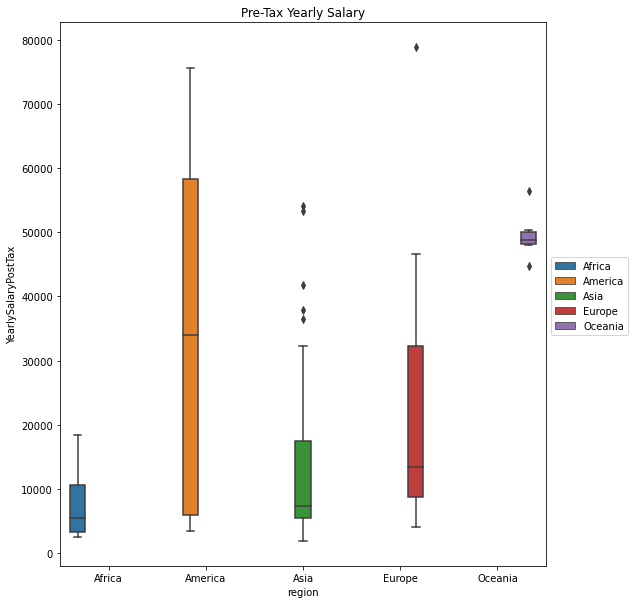

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
df_salary=df_table_new[['City','region','YearlySalaryPostTax']]
sns.boxplot(data=df_salary, x='region',y='YearlySalaryPostTax', hue='region')
ax.set_title('Pre-Tax Yearly Salary')
fig.subplots_adjust(right=0.8)
ax.legend(
    loc="center left",
    bbox_to_anchor=(0.8, 0.5),
    bbox_transform=fig.transFigure
); 

From the above graph it shows that oceania has the highest average yearly salary after tax of the five regions while the african and asian regions are comparitatively the lowest.

Text(0.5, 1.0, 'Oceania')

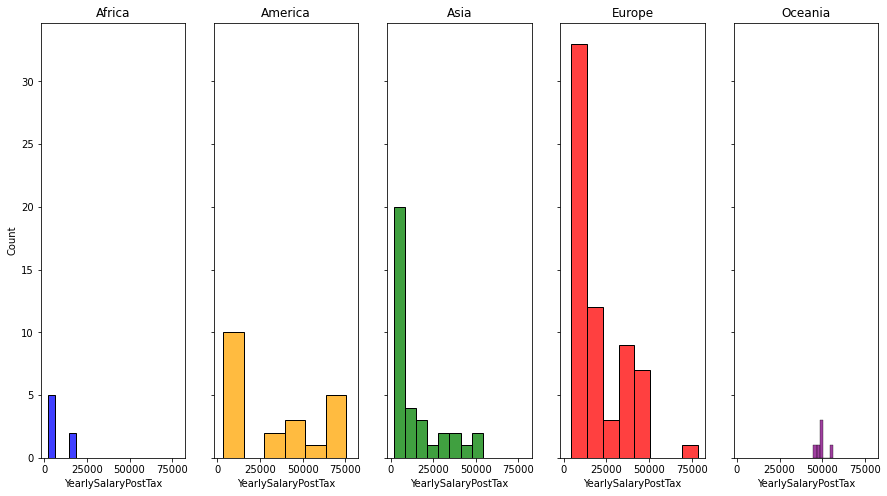

In [46]:
fig, axs = plt.subplots(1,5, sharey= True, sharex= True, figsize=(15,8))
sns.histplot(data = df_table_new[df_table_new['region'] == 'Africa'],
             x='YearlySalaryPostTax', color='blue', ax=axs[0])
axs[0].set_title('Africa')
sns.histplot(data = df_table_new[df_table_new['region'] == 'America'],
             x='YearlySalaryPostTax', color='orange', ax=axs[1])
axs[1].set_title('America')
sns.histplot(data = df_table_new[df_table_new['region'] == 'Asia'],
             x='YearlySalaryPostTax', color='green', ax=axs[2])
axs[2].set_title('Asia')
sns.histplot(data = df_table_new[df_table_new['region'] == 'Europe'],
             x='YearlySalaryPostTax', color='red', ax=axs[3])
axs[3].set_title('Europe')
sns.histplot(data = df_table_new[df_table_new['region'] == 'Oceania'],
             x='YearlySalaryPostTax', color='purple', ax=axs[4])
axs[4].set_title('Oceania')

On average it appears that Oceania has the highest salaries! However if one were to account for highest potential salary, it seems the US region would be ideal (not accounting for visual boxplot outliers).

In [44]:
print('Below are Median Yearly Salaries post tax per region:')
print('Africa:', np.median(df_table_new[df_table_new['region'] == 'Africa'].YearlySalaryPostTax))
print('America:', np.median(df_table_new[df_table_new['region'] == 'America'].YearlySalaryPostTax))
print('Asia:', np.median(df_table_new[df_table_new['region'] == 'Asia'].YearlySalaryPostTax))
print('Europe:', np.median(df_table_new[df_table_new['region'] == 'Europe'].YearlySalaryPostTax))
print('Oceania:', np.median(df_table_new[df_table_new['region'] == 'Oceania'].YearlySalaryPostTax))
print('-----------------------------------')
print('Below are Mean Yearly Salaries post tax +/- 1 standard deviation per region:')
print('Africa:', np.mean(df_table_new[df_table_new['region'] == 'Africa'].YearlySalaryPostTax), '+/-',
      np.std(df_table_new[df_table_new['region'] == 'Africa'].YearlySalaryPostTax))
print('America:', np.mean(df_table_new[df_table_new['region'] == 'America'].YearlySalaryPostTax), '+/-',
     np.std(df_table_new[df_table_new['region'] == 'America'].YearlySalaryPostTax))
print('Asia:', np.mean(df_table_new[df_table_new['region'] == 'Asia'].YearlySalaryPostTax), '+/-',
     np.std(df_table_new[df_table_new['region'] == 'Asia'].YearlySalaryPostTax))
print('Europe:', np.mean(df_table_new[df_table_new['region'] == 'Europe'].YearlySalaryPostTax), '+/-', 
     np.std(df_table_new[df_table_new['region'] == 'Europe'].YearlySalaryPostTax))
print('Oceania:', np.mean(df_table_new[df_table_new['region'] == 'Oceania'].YearlySalaryPostTax), '+/-',
     np.std(df_table_new[df_table_new['region'] == 'Oceania'].YearlySalaryPostTax))


Below are Median Yearly Salaries post tax per region:
Africa: 5423.88
America: 33986.28
Asia: 7369.08
Europe: 13353.48
Oceania: 48800.58
-----------------------------------
Below are Mean Yearly Salaries post tax +/- 1 standard deviation per region:
Africa: 7732.422857142857 +/- 5958.016227661481
America: 32617.62857142857 +/- 27170.81649460761
Asia: 14512.059428571429 +/- 14475.352530587581
Europe: 19732.62276923077 +/- 14791.49322166864
Oceania: 49514.30000000001 +/- 3491.622451354096


## 5.0 Conclusion

In [60]:
print('Dining out at restaurant frequency per region accounting for salary and rent:')
print('Africa:', np.median(df_table_new[df_table_new['region'] == 'Africa'].YearlySalaryPostTax) -
                           np.median(df_table_new[df_table_new['region'] == 'Africa'].OuterCity1of3) / 
                          np.median(df_table_new[df_table_new['region'] == 'Africa'].RestaurantMealfor1))
print('America:', np.median(df_table_new[df_table_new['region'] == 'America'].YearlySalaryPostTax) -
                           np.median(df_table_new[df_table_new['region'] == 'America'].OuterCity1of3) / 
                          np.median(df_table_new[df_table_new['region'] == 'America'].RestaurantMealfor1))
print('Asia:', np.median(df_table_new[df_table_new['region'] == 'Asia'].YearlySalaryPostTax) -
                           np.median(df_table_new[df_table_new['region'] == 'Asia'].OuterCity1of3) / 
                          np.median(df_table_new[df_table_new['region'] == 'Asia'].RestaurantMealfor1))
print('Europe:', np.median(df_table_new[df_table_new['region'] == 'Europe'].YearlySalaryPostTax) -
                           np.median(df_table_new[df_table_new['region'] == 'Europe'].OuterCity1of3) / 
                          np.median(df_table_new[df_table_new['region'] == 'Europe'].RestaurantMealfor1))
print('Oceania:', np.median(df_table_new[df_table_new['region'] == 'Oceania'].YearlySalaryPostTax) -
                           np.median(df_table_new[df_table_new['region'] == 'Oceania'].OuterCity1of3) / 
                          np.median(df_table_new[df_table_new['region'] == 'Oceania'].RestaurantMealfor1))

Dining out at restaurant frequency per region accounting for salary and rent:
Africa: 5410.8137875288685
America: 33971.6619697506
Asia: 7355.234778118162
Europe: 13340.395328429046
Oceania: 48786.36997066327


Looking at the following categories rent, eating out expenses, and salary individually. If we are looking solely at the cheapest place to live, we'd want to reside in the african region outside the city center sharing a 3 bedroom apartment with roommates. If we are looking solely at the cheapest place for eating out, we'd want to reside in africa (without considering one's salary). In terms of highest salary, we would want to work primarily in oceania.

However, once we start facting in the 3 categories together, the ideal place to live where we'd maximize out salary, be able to eat out the most, while having the cheapest rent of living with roomates in a non-city center apartment, would be Oceania.

